## Project 5, Ensemble Machine learning using wine dataset
### Author: Mahesh Bashyal
### Date: November 21, 2025

### Introduction: In this project, we will use the wine quality dataset to compare two ensemble models to evaluate their model performance. We will compare two models, Bagging and MLP classifier model to predict which will perform better with this dataset based on accuracy and F1 scores. 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

## Section 1. Load and Inspect the Data

In [3]:
# Load the dataset (download from UCI and save in the same folder)
df = pd.read_csv("winequality-red.csv", sep=";")

# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Section 2. Prepare the Data

In [4]:
# Define helper function that:

# Takes one input, the quality (which we will temporarily name q while in the function)
# And returns a string of the quality label (low, medium, high)
# This function will be used to create the quality_label column
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"


# Call the apply() method on the quality column to create the new quality_label column
df["quality_label"] = df["quality"].apply(quality_to_label)


# Then, create a numeric column for modeling: 0 = low, 1 = medium, 2 = high
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2


df["quality_numeric"] = df["quality"].apply(quality_to_number)

# Explain what we do and why as you proceed. 

## Section 3 - Feature Selection and Justification

In [5]:
# Define input features (X) and target (y)
# Features: all columns except 'quality' and 'quality_label' and 'quality_numberic' - drop these from the input array
# Target: quality_label (the new column we just created)
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])  # Features
y = df["quality_numeric"]  # Target
# Explain / introduce your choices.


### Input features
- fixed acidity

- volatile acidity

- citric acid

- residual sugar

- chlorides

- free sulfur dioxide

- total sulfur dioxide

- density

- pH

- sulphates

- alcohol


#### Target feature: Quality

## Section 4. Split the Data into Train and Test



In [6]:
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Section 5. Evaluate Model Performance (Choose 2)

### Below is a list of 9 model variations. Choose two to focus on for your comparison.

| Option | Model Name                        | Notes                                                          |
| ------ | --------------------------------- | -------------------------------------------------------------- |
| 1      | Random Forest (100)               | A strong baseline model using 100 decision trees.              |
| 2      | Random Forest (200, max_depth=10) | Adds more trees, but limits tree depth to reduce overfitting.  |
| 3      | AdaBoost (100)                    | Boosting method that focuses on correcting previous errors.    |
| 4      | AdaBoost (200, lr=0.5)            | More iterations and slower learning for better generalization. |
| 5      | Gradient Boosting (100)           | Boosting approach using gradient descent.                      |
| 6      | Voting (DT + SVM + NN)            | Combines diverse models by averaging their predictions.        |
| 7      | Voting (RF + LR + KNN)            | Another mix of different model types.                          |
| 8      | Bagging (DT, 100)                 | Builds many trees in parallel on different samples.            |
| 9      | MLP Classifier                    | A basic neural network with one hidden layer.                  |


In [7]:
# Here's a helper function that might be nice - feel free to use or adjust as you like. 


# Helper function to train and evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )
#Here's how to create the different types of ensemble models listed above (you don't need to do all of them yourself. Choose 2 - we have a whole team working on this.)

results = []

### 9. MLP Classifier (1st model selected, #9 from the list )

In [39]:
# 9. MLP Classifier 
MLP=MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
evaluate_model(
    "MLP Classifier",
    MLP,
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)



MLP Classifier Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 257   7]
 [  0  30  13]]
Train Accuracy: 0.8514, Test Accuracy: 0.8438
Train F1 Score: 0.8141, Test F1 Score: 0.8073


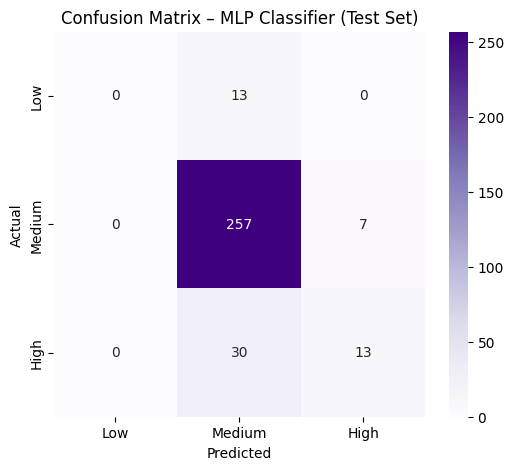

In [44]:
y_test_pred_MLP = MLP.predict(X_test)
labels = ["Low", "Medium", "High"]
plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred_MLP), # Use the correct prediction variable
    annot=True, 
    fmt="d", 
    cmap="Purples", # Corrected 'Purlples' typo to 'Purples'
    xticklabels=labels, 
    yticklabels=labels
)
plt.title("Confusion Matrix – MLP Classifier (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 8. Bagging (DT, 100) (2nd model selected #8 from the list)

In [45]:

# 10. Bagging (DT, 100)
BaggingDT = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

evaluate_model(
    "Bagging (DT, 100)",
    BaggingDT,
    X_train,
    y_train,
    X_test,
    y_test,
    results
)




Bagging (DT, 100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 252  12]
 [  0  12  31]]
Train Accuracy: 1.0000, Test Accuracy: 0.8844
Train F1 Score: 1.0000, Test F1 Score: 0.8655


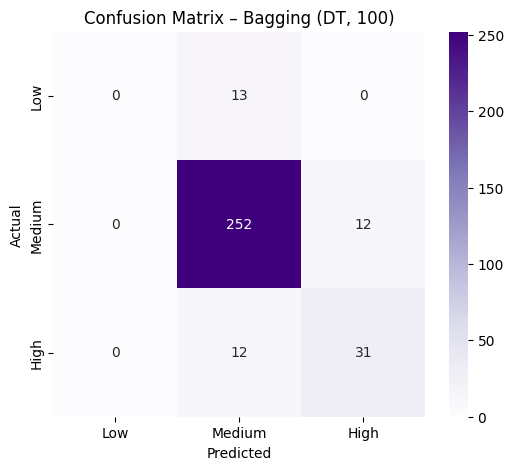

In [46]:

y_test_pred_BaggingDT = BaggingDT.predict(X_test)

# Class labels
labels = ["Low", "Medium", "High"]

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_test_pred_BaggingDT),
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=labels,
    yticklabels=labels
)
plt.title("Confusion Matrix – Bagging (DT, 100)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Section 6. Compare Results


In [47]:

# Convert results list into a DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.drop_duplicates(subset=["Model"])

# Display summary table
print("\nSummary of All Models:")
display(results_df)



Summary of All Models:


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1
0,MLP Classifier,0.851446,0.843750,0.814145,0.807318
1,"Bagging (DT, 100)",1.000000,0.884375,1.000000,0.865452


### Section 7. Conclusions and Insights

### Based on the results from the confusion matrix for the Bagging Model,this model is strong when identifying "medium cases" but poor in identifying "low cases" and better at identifying high quality wines compared to MLP model. 

### Similarly, based on the results from the confusion matrix for the MLP classified model, it is very strong when identifying "medium cases" and also similarly poor in identifying "low cases" but lower in identifying high quality wines compared to Bagging model.

### Based on metrics such as accuracy and F1 scores, Bagging method has better accuracy (0.88 vs 0.84) and slightly better F1 scores (0.86 vs 0.80) when compared to MLP classifier model. However, we also have to acknowledge the fact that there seems to be a little bit of overfitting problem with Bagging method as the gap between training and testing accuracy and F1 scores seems to be higher compared to MLP classifier method. 


### When I compared my results with the peers (Brandon) I found that Random Forest seems to do well based on accuracy and F1 scores while acknowledging that it may also have an overfitting problem. 
https://github.com/brandonjbbb/applied-ml-brandon/blob/main/notebooks/project05/ensemble-brandon.ipynb

### One of our colleague (Womenker Karto) also found out that the boosting model such as (Adaboost) showed least performance values in accuracy and F1 score but had very small gaps between training and testing indicating stable generalization but limited capacity for this dataset.

https://github.com/wkarto/applied-ml-karto/blob/main/notebooks/project05/ensemble-karto.ipynb


